In [126]:
import os
from os import walk
import eyed3
from eyed3.id3 import apple
GRP1 = apple.GRP1
import csv
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt

In [84]:
#Alle automatisch heruntergeladenen Songdateien werden aufgerufen die 
#vor der Automatischen Abspeicherung in der CSV heruntergeladen wurden.
f = []
for (dirpath, dirnames, filenames) in walk('/Users/maherp/Desktop/Downloaded Tracks'):
    f.extend(filenames, )
    break


['04 Daddy (Clean).mp3', '01 Lonely (Extended) (Instrumental).mp3', 'Dumebi.mp3', '01 Wings (Extended Mix).mp3', '01 Down.mp3', '01 Fire Burning On The Dancefloor.mp3', '01 Move Up Ya Body (Original Mix).mp3', '01 Shen Yeng Anthem (Clean).mp3', '01 Drunk Girls In The Club (Clean).mp3', '01 Crazy (Radio Edit).mp3', '.DS_Store', '01 Later Bitches (Radio Edit) (Clean).mp3', '01 Money Play (Main).mp3', '01 Apologize (Sultan & Shepard Remix).mp3', '01 Toosie Slide (Intro Outro) (Dirty).mp3', '01 Trust The Process (Original Mix).mp3', '01 Like Glue (David S One Dance Remix).mp3', '01 Lights Go Down (Clean).mp3', '01 Falling Like Angels (Original Mix).mp3', '01 Break Your Heart.MP3.mp3', '01 Shed A Light (Radio Edit).mp3', '01 Fergalicious (N Code Bootleg Remix).mp3', '01 Knockout (Extended).mp3', '01 Anybody (Radio Edit).mp3', '01 Love Is Gone (Vuk Milivojevics Bad Things Remix).mp3', '01 Really Need You.mp3', '01 Walking On A Dream (Mike Foyle And X Vertigo Remix).mp3', '01 Condo (Clean).mp

In [144]:
#Für Jede Datei wird der Titel, Künstlername und das Gruppierungstag welches die Playlistverknüpfung enthält gespeichert.
t=[]
a=[]
p=[]
i=0
while i < len(f):
    Pfad = os.path.join('/Users/maherp/Desktop/Downloaded Tracks', f[i])
    audiofile = eyed3.load(Pfad)
    if '.DS_Store' not in f[i] :
        t.append(audiofile.tag.title)
        a.append(audiofile.tag.artist)
        p.append(audiofile.tag.frame_set[b"GRP1"][0].text.split(" ")[0])
    i += 1



Lame tag CRC check failed
Lame tag CRC check failed


In [148]:
#Diese Inforamtionen werden in die CSV Datei geschrieben.
writer = csv.writer(open("Spotify_FRP_to_Itunes_Downloader.csv", "w"))
writer.writerow(["Titel", "Artist", "Playlist"])

i=0
while i < len(t):
    writer.writerow([t[i], a[i], p[i]])
    i+=1

In [173]:
#Die CSV Datei wird mit Pandas als Dataframe aufgerufen.
df = pd.read_csv("Spotify_FRP_to_Itunes_Downloader.csv"
                , delimiter=",")
df.head()

,Titel,Artist,Playlist
0,Daddy (Clean),Blueface,auto_download
1,Lonely (Extended) (Instrumental),Joel Corry,Dance
2,Dumebi (Major Lazer Remix) (Clean),Rema,auto_download
3,Wings (Extended Mix),Armand Van Helden,House
4,Down,Jay Sean ft Lil Wayne,2000er


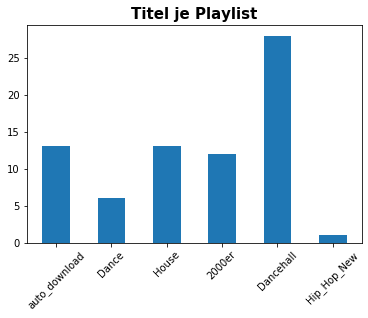

In [195]:
#Für die anzahl der Titel je Playlist wird ein Balkendiagramm erstellt.
List1=[]
List2=[]
for i in df.Playlist.unique():
    List1.append(i)
    List2.append(len(df[df["Playlist"]==i]))
plt.bar(List1, List2, width=0.5)
plt.xticks(rotation=45)
plt.title('Titel je Playlist', {'fontsize': 15, 'fontweight' : 'bold'})
plt.savefig('bar_chart.pdf')  

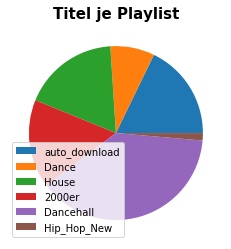

In [196]:
#Für die anzahl der Titel je Playlist wird ein Kuchendiagramm erstellt.
plt.pie(List2)
plt.legend(df.Playlist.unique())
plt.title('Titel je Playlist', {'fontsize': 15, 'fontweight' : 'bold'})
plt.savefig('pie_chart.pdf')  